<a href="https://colab.research.google.com/github/hemantkashniyal/EVA4/blob/master/notebooks/Session7/Session_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pwd

import torch
print(torch.cuda.is_available())

! git clone https://github.com/hemantkashniyal/EVA4.git || true
! git -C EVA4 pull
! cp -r /content/EVA4/notebooks/Session7/* .

/content
True
fatal: destination path 'EVA4' already exists and is not an empty directory.
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/hemantkashniyal/EVA4
   fdc1be5..095e0ce  master     -> origin/master
Updating fdc1be5..095e0ce
Fast-forward
 notebooks/Session7/cifar10.experiment.env | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [2]:
%env PYTHONDONTWRITEBYTECODE=true
! pip install -r requirements.txt
    

env: PYTHONDONTWRITEBYTECODE=true


In [3]:
%matplotlib inline

import json
from torchsummary import summary
from environs import Env

from torchvision import datasets, transforms
from eva4.common import reset_seed, get_config, get_device
env = Env()
env.read_env("./cifar10.experiment.env", recurse=False)

reset_seed()
model_config = get_config(env)
print("Experiment Config: ", json.dumps(model_config, sort_keys=False, indent=4))

Experiment Config:  {
    "cuda_available": true,
    "device": "cuda",
    "epochs": 100,
    "desired_accuracy": 80.0,
    "break_on_reaching_desired_accuracy": true,
    "consecutive_desired_accuracy": 3,
    "input_size": [
        3,
        32,
        32
    ],
    "input_channel": 3,
    "input_dimension": [
        32,
        32
    ],
    "dataset": "CIFAR10",
    "batch_size": 512,
    "shuffle": true,
    "num_workers": 4,
    "pin_memory": true,
    "dropout": 0.1,
    "bias_enabled": true,
    "optimizer": "SGD",
    "learning_rate": 0.1,
    "momentum": 0.9,
    "scheduler": "MultiStepLR",
    "step_size": 3,
    "milestones": [
        10,
        20,
        35,
        50
    ],
    "gamma": 0.1
}


In [4]:
from imageaug.transforms import Colorspace, RandomAdjustment, RandomRotatedCrop
from eva4.dataloader.cifar10 import get_mean_std, get_data_loader, DATA_CLASSES, print_data_stats

train_transforms = None
test_transforms = None

reset_seed()
train_loader, test_loader = get_data_loader(train_transforms, test_transforms, model_config)

train_data_mean, train_data_std = get_mean_std()
test_data_mean, test_data_std = get_mean_std()


Files already downloaded and verified
Files already downloaded and verified
CIFAR10 data_mean: (0.4914, 0.4822, 0.4465)
CIFAR10 data_std: (0.247, 0.2435, 0.2616)
CIFAR10 data_mean: (0.4914, 0.4822, 0.4465)
CIFAR10 data_std: (0.247, 0.2435, 0.2616)


In [0]:
from imageaug.transforms import Colorspace, RandomAdjustment, RandomRotatedCrop

input_size = model_config.get("input_size")
crop_size = model_config.get("input_dimension")
angle_std = 7 # in degrees


train_transforms = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.ToPILImage(),
                                      transforms.Resize(crop_size),
                                      RandomRotatedCrop(crop_size, 0.0, angle_std, downscale=0.5),
                                      transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                      transforms.ToTensor(),
                                      transforms.Normalize(train_data_mean, train_data_std)
                                      ])

test_transforms = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.ToPILImage(),
                                      transforms.Resize(crop_size),
                                      transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                      transforms.ToTensor(),
                                      transforms.Normalize(train_data_mean, train_data_std)
                                      ])

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

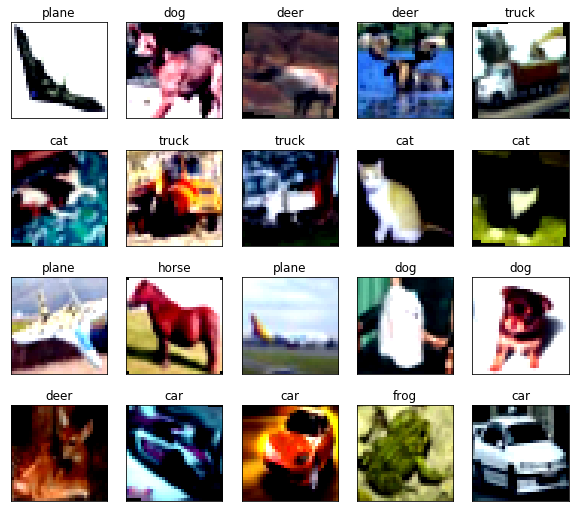

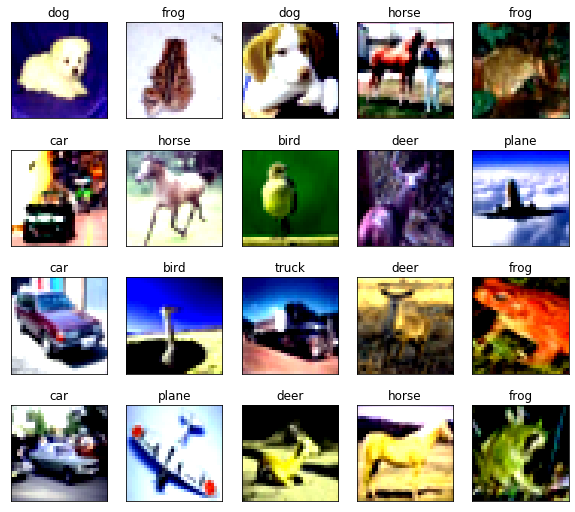

In [6]:
reset_seed()
train_loader, test_loader = get_data_loader(train_transforms, test_transforms, model_config)
print_data_stats(train_loader, model_config)
print_data_stats(test_loader, model_config)

Files already downloaded and verified
Files already downloaded and verified


/content/eva4/network/cifar10.py:64: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
  0%|          | 0/98 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
     InternalBlock-5           [-1, 16, 32, 32]               0
            Conv2d-6           [-1, 32, 32, 32]           4,608
              ReLU-7           [-1, 32, 32, 32]               0
       BatchNorm2d-8           [-1, 32, 32, 32]              64
           Dropout-9           [-1, 32, 32, 32]               0
    InternalBlock-10           [-1, 32, 32, 32]               0
           Conv2d-11           [-1, 64, 30, 30]          18,432
             ReLU-12           [-1, 64, 30, 30]               0
      BatchNorm2d-13           [-1, 64, 30, 30]             128
          Dropout-14           [-1, 64,

Loss=1.3517203330993652 Batch_id=97 Accuracy=37.24: 100%|██████████| 98/98 [00:37<00:00,  4.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.5016, Accuracy: 4563/10000 (45.63%)

EPOCH: 1


Loss=1.2012052536010742 Batch_id=97 Accuracy=53.23: 100%|██████████| 98/98 [00:37<00:00,  4.15it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.1674, Accuracy: 5866/10000 (58.66%)

EPOCH: 2


Loss=1.0056990385055542 Batch_id=97 Accuracy=61.81: 100%|██████████| 98/98 [00:37<00:00,  4.27it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.9389, Accuracy: 6716/10000 (67.16%)

EPOCH: 3


Loss=0.9317561388015747 Batch_id=97 Accuracy=66.98: 100%|██████████| 98/98 [00:37<00:00,  4.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.9294, Accuracy: 6843/10000 (68.43%)

EPOCH: 4


Loss=0.8622824549674988 Batch_id=97 Accuracy=70.62: 100%|██████████| 98/98 [00:37<00:00,  4.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8588, Accuracy: 7113/10000 (71.13%)

EPOCH: 5


Loss=0.7289637923240662 Batch_id=97 Accuracy=73.16: 100%|██████████| 98/98 [00:38<00:00,  4.33it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7522, Accuracy: 7403/10000 (74.03%)

EPOCH: 6


Loss=0.7698511481285095 Batch_id=97 Accuracy=74.78: 100%|██████████| 98/98 [00:37<00:00,  3.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7622, Accuracy: 7399/10000 (73.99%)

EPOCH: 7


Loss=0.7162124514579773 Batch_id=97 Accuracy=76.43: 100%|██████████| 98/98 [00:37<00:00,  4.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7156, Accuracy: 7615/10000 (76.15%)

EPOCH: 8


Loss=0.6232465505599976 Batch_id=97 Accuracy=77.36: 100%|██████████| 98/98 [00:37<00:00,  4.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7993, Accuracy: 7369/10000 (73.69%)

EPOCH: 9


Loss=0.6589812636375427 Batch_id=97 Accuracy=78.23: 100%|██████████| 98/98 [00:38<00:00,  4.11it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6772, Accuracy: 7709/10000 (77.09%)

EPOCH: 10


Loss=0.544508695602417 Batch_id=97 Accuracy=81.49: 100%|██████████| 98/98 [00:38<00:00,  4.28it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5810, Accuracy: 8019/10000 (80.19%)

EPOCH: 11


Loss=0.37793439626693726 Batch_id=97 Accuracy=82.46: 100%|██████████| 98/98 [00:37<00:00,  4.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5765, Accuracy: 8063/10000 (80.63%)

EPOCH: 12


Loss=0.43994390964508057 Batch_id=97 Accuracy=83.09: 100%|██████████| 98/98 [00:38<00:00,  4.26it/s]



Test set: Average loss: 0.5641, Accuracy: 8102/10000 (81.02%)



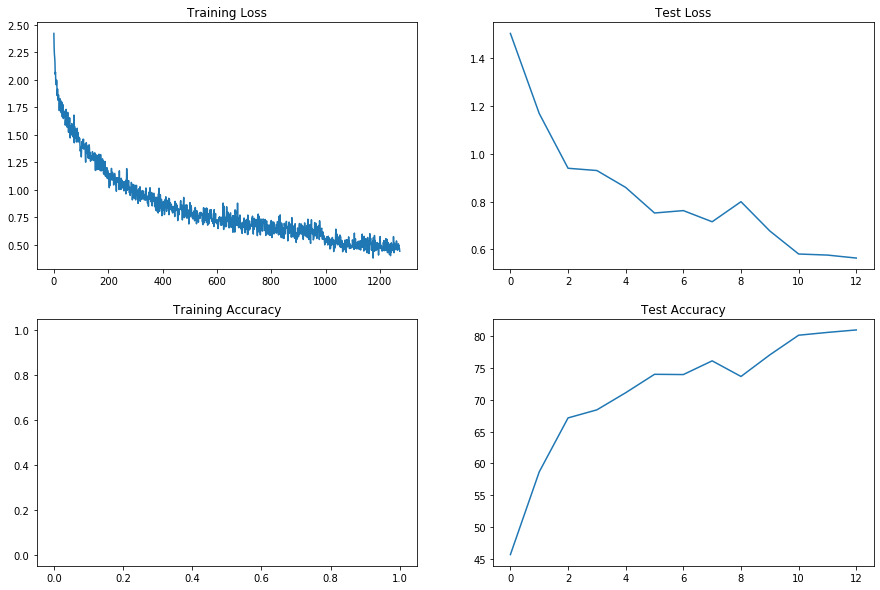

In [7]:
from eva4.network.cifar10 import CIFAR10Net
from eva4.optimizer import get_optimizer
from eva4.scheduler import get_scheduler
from eva4.train import start_training

reset_seed()
train_loader, test_loader = get_data_loader(train_transforms, test_transforms, model_config)

device = get_device(model_config)
model = CIFAR10Net(model_config).to(device)
optimizer = get_optimizer(model, model_config)
scheduler = get_scheduler(optimizer, model_config)

input_size = (3,32,32)
summary(model, input_size = input_size)
start_training(model, device, train_loader, test_loader, optimizer, scheduler, model_config)